# Processing Sequences Using RNNs (Recurrent Neural Networks) and CNNs:

- Recurrent Neural Networks :
  - A class of nets that can predict the future (..up to a point)
  - RNNs can analyze time series data. Once an RNN learns past patterns in the data, it is able to use its knowledge to forecast the future, assuming of course that past patterns still hold in the future.
  - RNNs can work on sequences of arbitrary lengths, rather than on fixed-sized inputs.
    - They can take sentences, documents, or audio samples as inputs, making them extremely useful for natural language processing applications such as automatic translation or speech-to-text.'
- Two main difficulties that RNNs face:

  - Unstable gradients, w/c can be alleviated using various techniques, including recurrent dropout and recurrent layer normalization.
  - A very limited short-term memory, w/c can be extended using LSTM and GRU cells.

- RNNs are not the only types of neural networks capable of handling sequential data. For small sequences, a regular dense network can do the trick, and for very long sequences, such as audio samples or text, convolutional neural networks can actually work quite well too.


# A. Recurrent Neurons and Layers:

- A recurrent neural network looks very much like a feedforward neural network, except it also has connections pointing backward.

- A recurrent neuron unrolled through time: <br>
  &emsp; 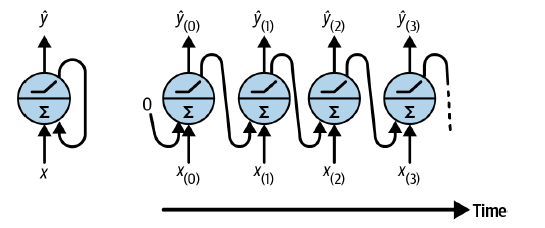 <br>

  - At each time step, $t$ (frame), this recurrent neuron receives the inputs $x_{(t)}$ as well as its own ouput from previous step , $\hat{y}_{t-1}$. Since there is no previous output at the first time step, it is generally set to 0.

- To createa layer of recurrent neurons:
  - At each time step, t, every neuron receives both the input vector $x_{t}$ and the output vector from the previous time step $\hat{y}_{t-1}$. Both the inputs and outputs are vectors. <br>
    &emsp; 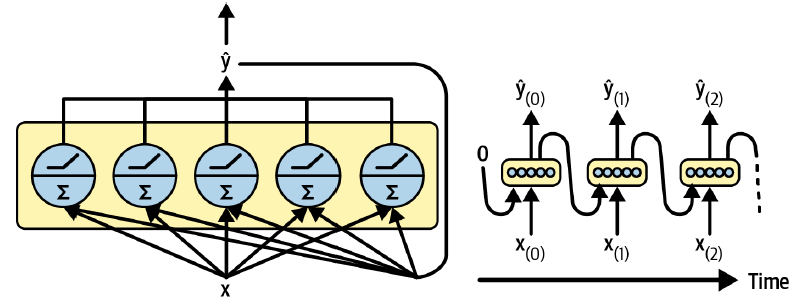 <br>
  - Each recurrent neuron has 2 sets of weights:
    - $W_x$ for the inputs $x_{t}$ and the other, $W_y$ for the outputs of the previous time step, $\hat{y}_{t-1}$.
  -  The output vector the whole recurrent layer can then be computed, where $b$ is the bias vector and $\phi(.)$ is the activation function:
        - $\hat{y}_{t} = \varphi(W_x^Tx_{t}\ +\ W_y^T({y}_{t-1})\ +\ b)$

### A.1. Memory Cells:

- Since the output of a recurrent neuron at time step t is a function of all the inputs from previous time steps, you could say it has a form of memory. A part of a neural network that preserves some state across time steps is called a *memory cell* (or simply
a cell).
    - A single recurrent neuron, or a layer of recurrent neurons, is a very basic cell, capable of learning only short patterns (typically about 10 steps long, but this varies depending on the task).

- Cell's State
    - A cell's state at time step t, $h_{t}$, is a function of some inputs at that time step and its state at the previous time step : $h_{t}\ =\ f(x_{(t)},\ h_{t-1})$.

- Cell's Output
    - A cell's ouput at time step t, $\hat{y}_{(t)}$, is a function of the previous state and the current inputs.

- In the case of the basic cells, the output is just equal to the state, but in more complex cells this is not always the case. <br>
    &emsp; 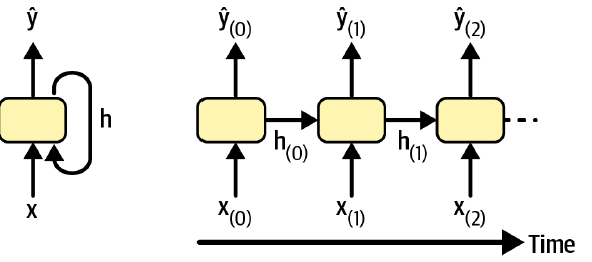 <br>

### A.2. Input and Output Sequences:

- **Sequence-to-sequence Network**:
    - An RNN that can simultaneously take a sequence of inputs and produce a sequence of outputs.
    - Useful for forecasting time series. <br>
    &emsp; 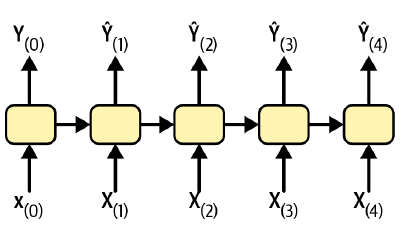 <br>

- **Sequence-to-vector Network**:
    - The network is fed a sequence of inputs and all outputs are ignored except for the last one.
    - For example, a network that is fed w/ a sequence of words corresponding to a movie review, and the network would output a sentiment score. <br>
    &emsp; 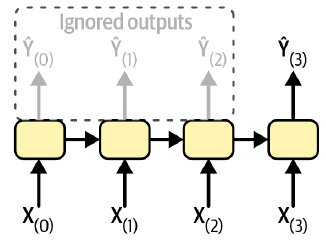 <br>

- **Vector-to-sequence Network**:
    - The network is fed the same input vector over and over again at each time step and let it output a sequence.
    - For example, the input could be an image, and the output could be a caption for that image. <br>
    &emsp; 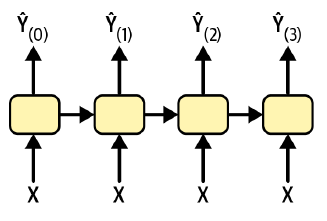 <br>

- **Encoder-Decord: Sequence-to-vector network (encoder) + vector-to-sequence network (decoder)**
    - For example, this could be used for translating a sentence from one language to another. The network is fed a sentence in one language, the encoder would convert this sentence into a single vector representation, and then the decoder would decode this vector into a sentence in another language. <br>
    &emsp; 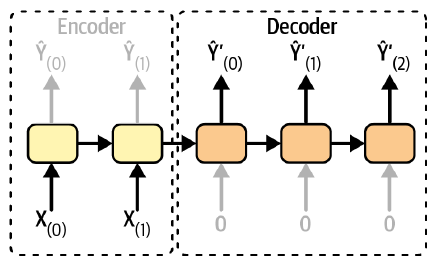 <br>

# B. Training RNNs:

* Back Packpropagation Through Time (BPTT):
    * Strategy for training RNN.
    * Unroll a RNN and then use regular backpropagation <br>
    &emsp; 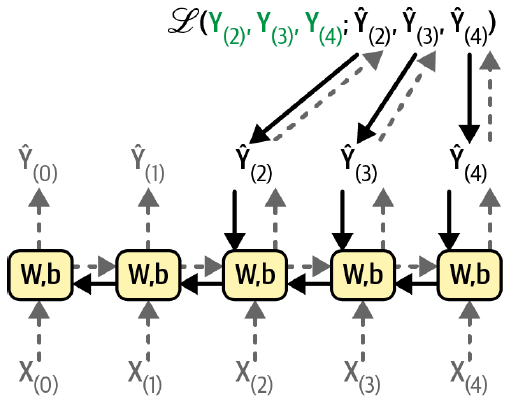 <br>
    - There is a first forward pass through the unrolled network (dashed arrows).
    - Then the output sequence is evaluated using a loss function $\mathcal{L}(Y_{(0)},Y_{(1)},..,Y_{(T)}; \hat{Y}_{(0)}, \hat{Y}_{(1)},.., \hat{Y}_{(T)})$:
        - Where $Y_{(i)}$, is the $i^{th}$  target, $\hat{Y}_{(i)}$ is the $i^{th}$ prediction.
        - This loss function may ignore some outputs.

# C. Forecasting a Time Series:

* *Naive Forecasting*:
    * Copying a past value to make our forecast. Naive forecasting is often a great baseline, and it can even be tricky to beat in some cases.

* When a time series is correlated w/ a lagged version, the time series is *autocorrelated*.

* The MAE, MAPE, and MSE are among the most common metrics used to evaluate forecasts.

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
url = "https://raw.githubusercontent.com/Spin8Cycle/data/main/data_samples/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv"
df = pd.read_csv(url, parse_dates=['service_date'])
df.columns = ['date', 'day_type', 'bus', 'rail', 'total']
df = df.sort_values('date').set_index('date')
df = df.drop("total", axis=1)  
df = df.drop_duplicates() 

In [3]:
df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


<Axes: xlabel='date'>

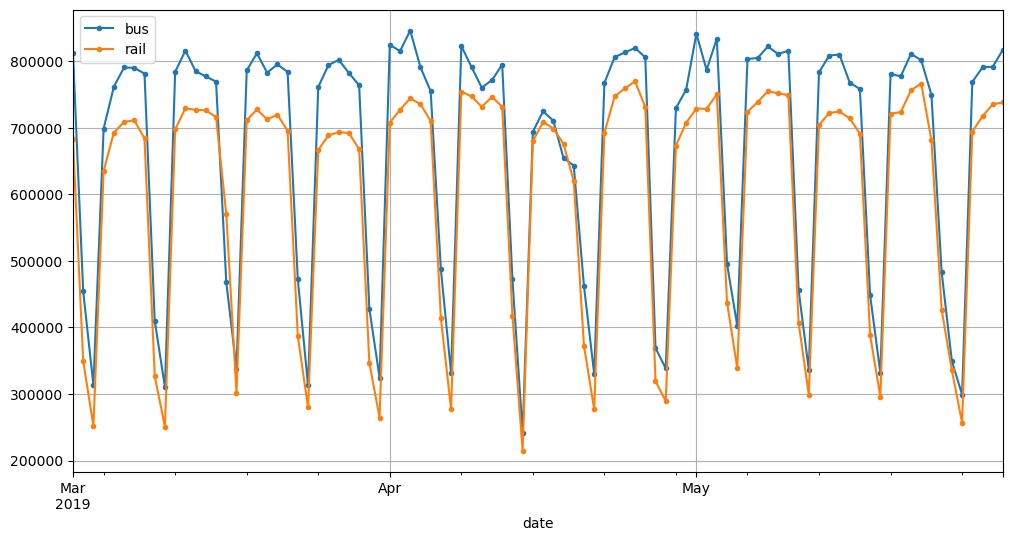

In [4]:
import matplotlib.pyplot as plt

df["2019-03":"2019-05"].plot(grid=True, marker=".", figsize=(12, 6))

(170000.0, 900000.0)

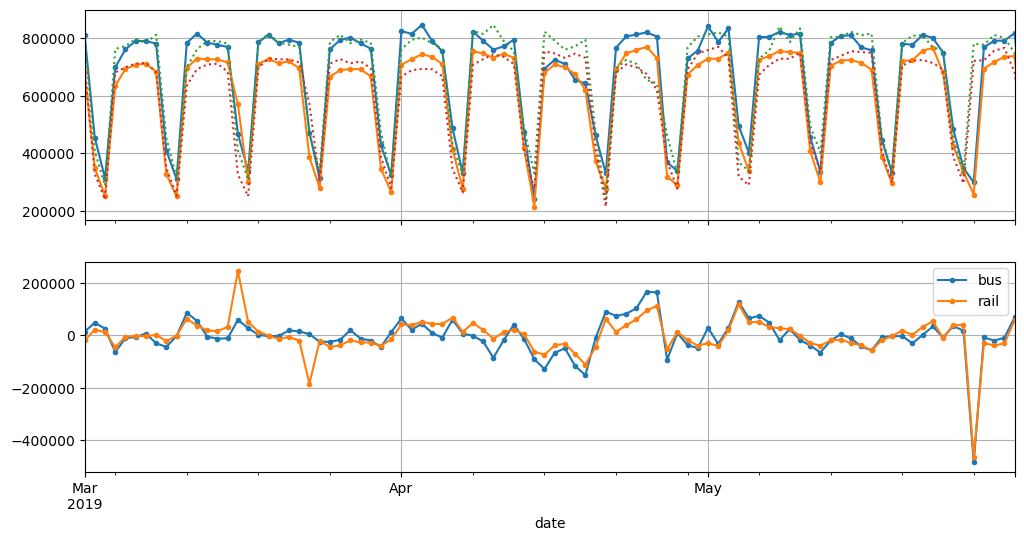

In [5]:
# Differencing
diff_7 = df[["bus", "rail"]].diff(7)["2019-03":"2019-05"]

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
df.plot(ax=axs[0], legend=False, marker=".")  # original time series
df.shift(7).plot(ax=axs[0], grid=True, legend=False, linestyle=":")  # lagged
diff_7.plot(ax=axs[1], grid=True, marker=".")  # 7-day difference time series
axs[0].set_ylim([170_000, 900_000])  

In [6]:
list(df.loc["2019-05-25":"2019-05-27"]["day_type"])

['A', 'U', 'U']

In [7]:
# Mean absolute Error
diff_7.abs().mean()

bus     43915.608696
rail    42143.271739
dtype: float64

In [8]:
# mean absolute percentage error
targets = df[["bus", "rail"]]["2019-03":"2019-05"]
(diff_7 / targets).abs().mean()

bus     0.082938
rail    0.089948
dtype: float64

In [14]:
period = slice("2001", "2019")
df_monthly = df[['rail', 'bus']].resample('M').mean()
df_monthly # compute the mean for each month

,rail,bus
date,,
2001-01-31,474591.419355,807190.580645
2001-02-28,488188.178571,848889.000000
2001-03-31,498825.096774,865392.419355
2001-04-30,490444.533333,835126.366667
2001-05-31,507862.258065,862701.419355
...,...,...
2021-07-31,257660.193548,342101.096774
2021-08-31,260038.548387,353215.516129
2021-09-30,299608.366667,401958.833333


<Axes: xlabel='date'>

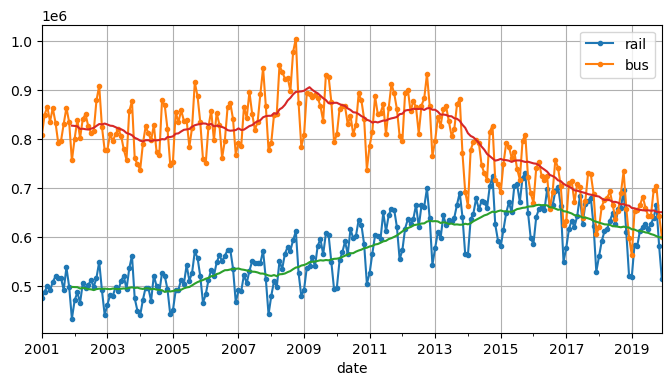

In [15]:
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()
fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)